In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('preprocessed_dataset.csv')

In [4]:
data.head()

,index,soil_moisture,soil_temperature,454,458,462,466,470,474,478,...,930,934,938,942,946,950,year,month,day,hour
0,0.0,33.51,34.8,-0.820790,-0.933076,-0.911946,-0.918558,-0.895983,-0.937692,-0.916785,...,-0.844442,-0.848906,-0.847418,-0.852499,-0.864668,-0.841753,2017,5,23,14
1,1.0,33.49,35.2,-0.913318,-0.962229,-0.968456,-0.940140,-0.942926,-0.914833,-0.937676,...,-0.878898,-0.883832,-0.864402,-0.819999,-0.794575,-0.770620,2017,5,23,14
2,2.0,33.46,35.4,-0.874888,-1.030703,-0.966399,-0.942754,-0.956636,-0.964497,-0.940893,...,-0.855017,-0.851385,-0.823587,-0.819934,-0.828697,-0.827617,2017,5,23,14
3,3.0,33.33,35.0,-0.965790,-0.981437,-0.972359,-0.918834,-0.934312,-0.918411,-0.906604,...,-0.852920,-0.851014,-0.828813,-0.810390,-0.758144,-0.742757,2017,5,23,14
4,4.0,33.32,35.3,-0.896976,-0.961759,-0.956435,-0.953026,-0.925257,-0.906755,-0.911004,...,-0.843084,-0.825724,-0.800567,-0.786257,-0.783971,-0.784635,2017,5,23,14


### Distribution of Soil Moisture & Temperature
##### 1. Graph: Histogram/Kernel Desnsity Estimation (KDE) plot.
##### 2. Purpose: To understand the spread and central tendency of soil moisture and temperature. This helps identify skewness, outliers, or bimodal             distribution.

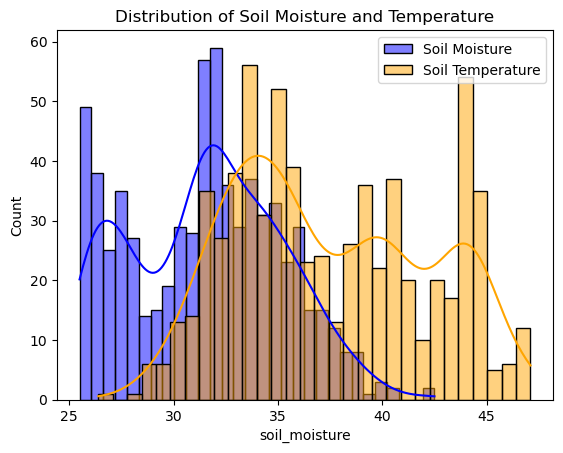

In [6]:
sns.histplot(data['soil_moisture'], kde=True, bins=30, color='blue', label='Soil Moisture')
sns.histplot(data['soil_temperature'], kde=True, bins=30, color='orange', label='Soil Temperature')
plt.legend()
plt.title('Distribution of Soil Moisture and Temperature')
plt.show()

#### Temporal Trends
##### 1. Graph: Line plot of soil moisture and temperature over time.
##### 2. Purpose: To observe how soil moisture and temperature vary over time, identifying patterns like seasonal or diurnal changes.

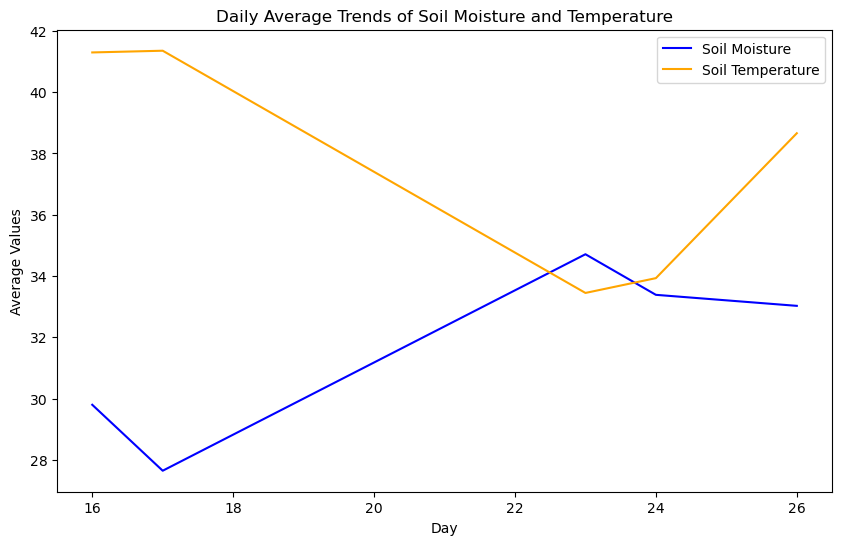

In [8]:
if 'day' in data.columns:
    daily_avg = data.groupby('day').mean()
    plt.figure(figsize=(10, 6))
    plt.plot(daily_avg['soil_moisture'], label='Soil Moisture', color='blue')
    plt.plot(daily_avg['soil_temperature'], label='Soil Temperature', color='orange')
    plt.legend()
    plt.title('Daily Average Trends of Soil Moisture and Temperature')
    plt.xlabel('Day')
    plt.ylabel('Average Values')
    plt.show()


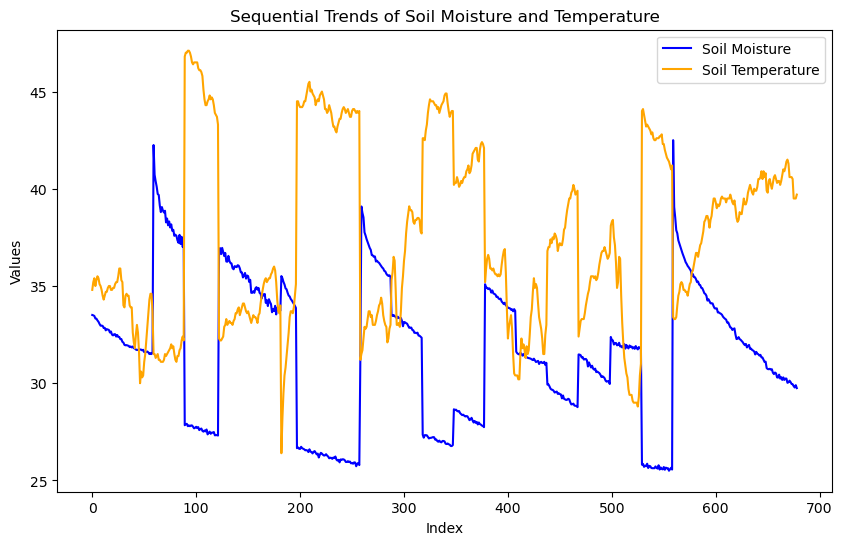

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['soil_moisture'], label='Soil Moisture', color='blue')
plt.plot(data.index, data['soil_temperature'], label='Soil Temperature', color='orange')
plt.legend()
plt.title('Sequential Trends of Soil Moisture and Temperature')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()


#### Spectral Response Analysis
##### 1. Graph: Line plot of average spectral values for different soil moisture ranges.
##### 2. Purpose: To understand how hyperspectral data varies with soil moisture, which is crucial for feature selection.

In [11]:
#Normalise hyperspectral data
hyperspectral_columns = [col for col in data.columns if col.isdigit()]
scaler = StandardScaler()
data[hyperspectral_columns] = scaler.fit_transform(data[hyperspectral_columns])

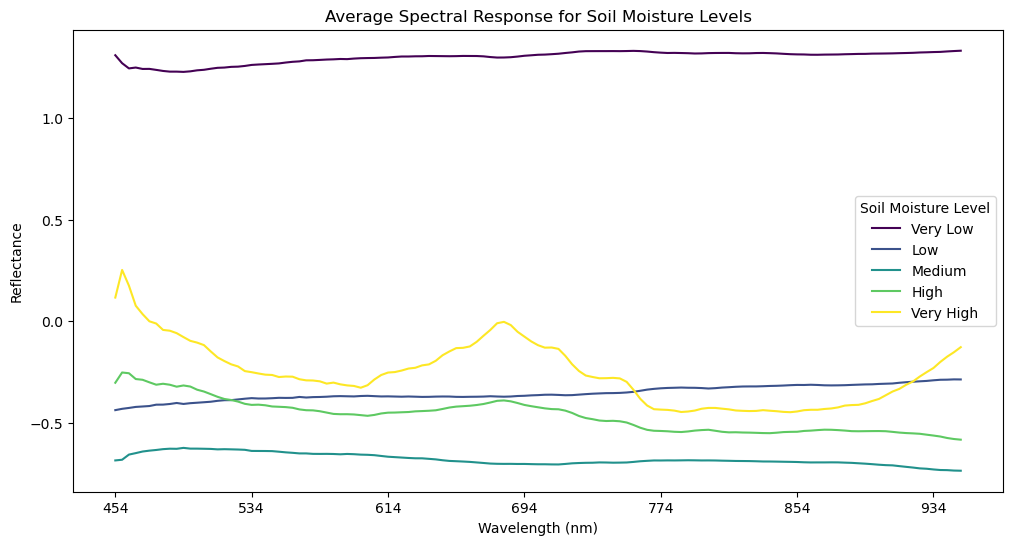

In [12]:
moisture_bins = pd.cut(data['soil_moisture'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
mean_spectra = data.groupby(moisture_bins)[hyperspectral_columns].mean().T
mean_spectra.plot(figsize=(12,6), colormap='viridis')
plt.title('Average Spectral Response for Soil Moisture Levels')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.legend(title='Soil Moisture Level')
plt.show()

#### Pairwise Relationships
##### 1. Graph: Pairplot (Scatter plots of feature pins)
##### 2. Purpose: To visualise interactions between features (e.g: soil moisture vs temperature, moisture vs spectral bands)

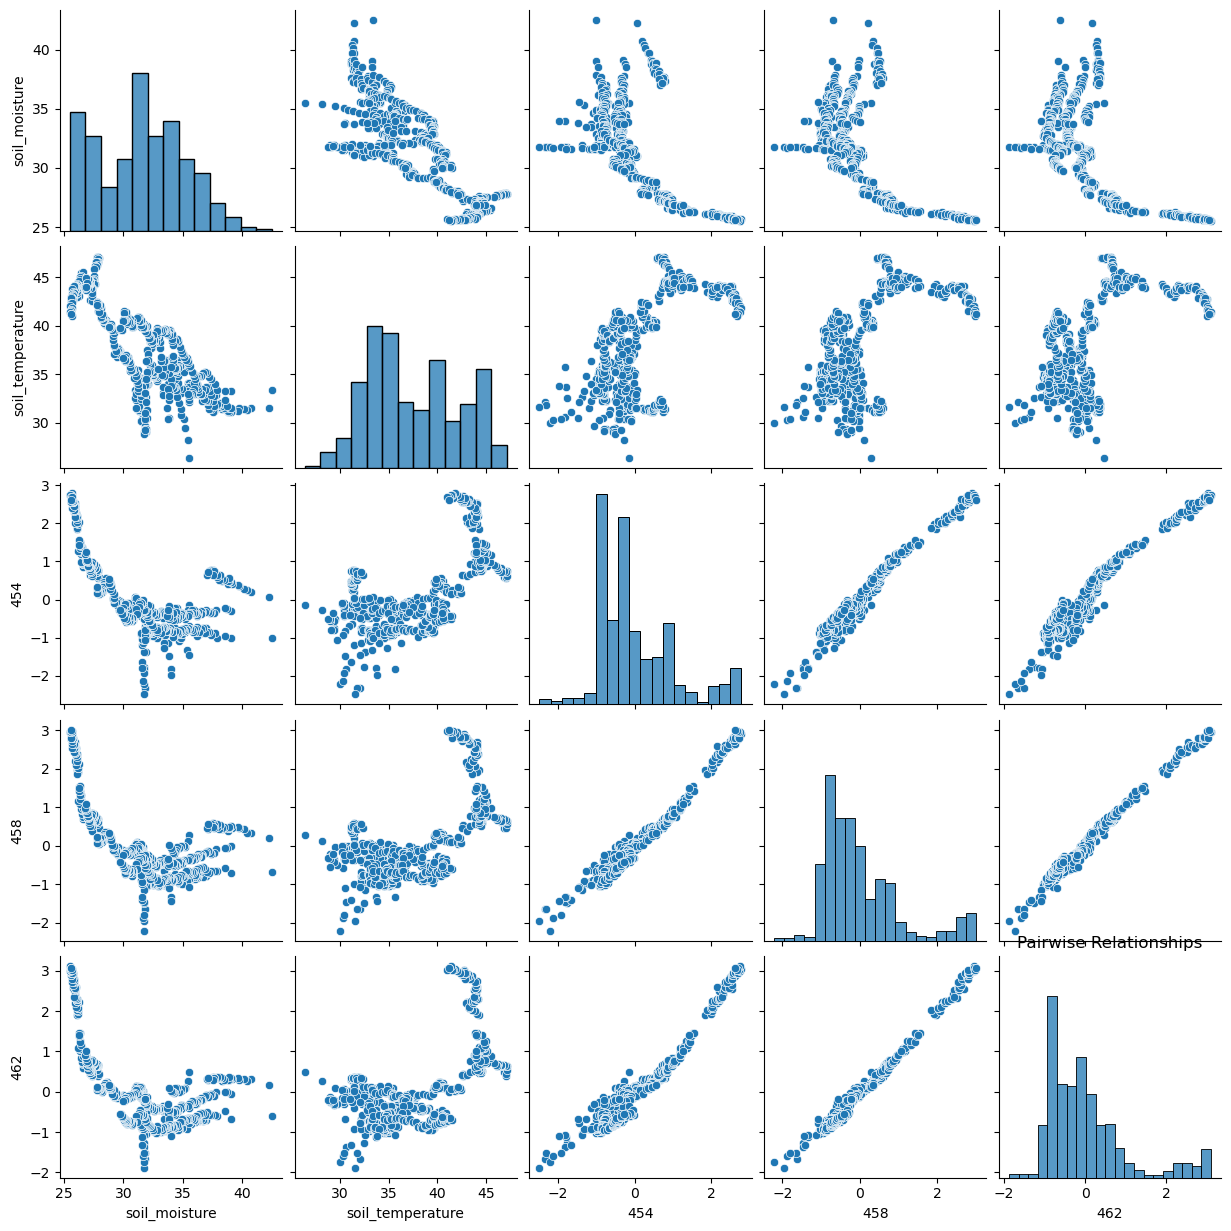

In [14]:
sns.pairplot(data, vars=['soil_moisture', 'soil_temperature'] + hyperspectral_columns[:3])
plt.title('Pairwise Relationships')
plt.show()

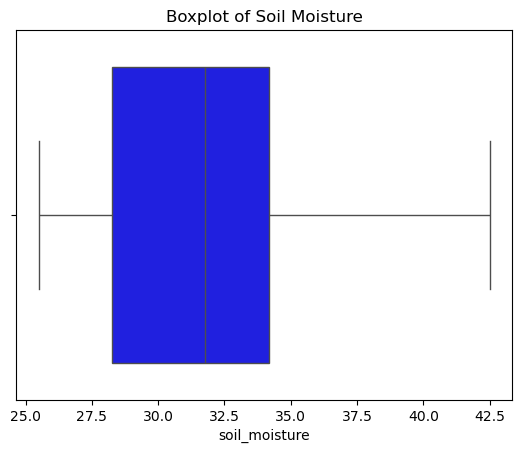

In [15]:
sns.boxplot(x=data['soil_moisture'], color='blue')
plt.title('Boxplot of Soil Moisture')
plt.show()

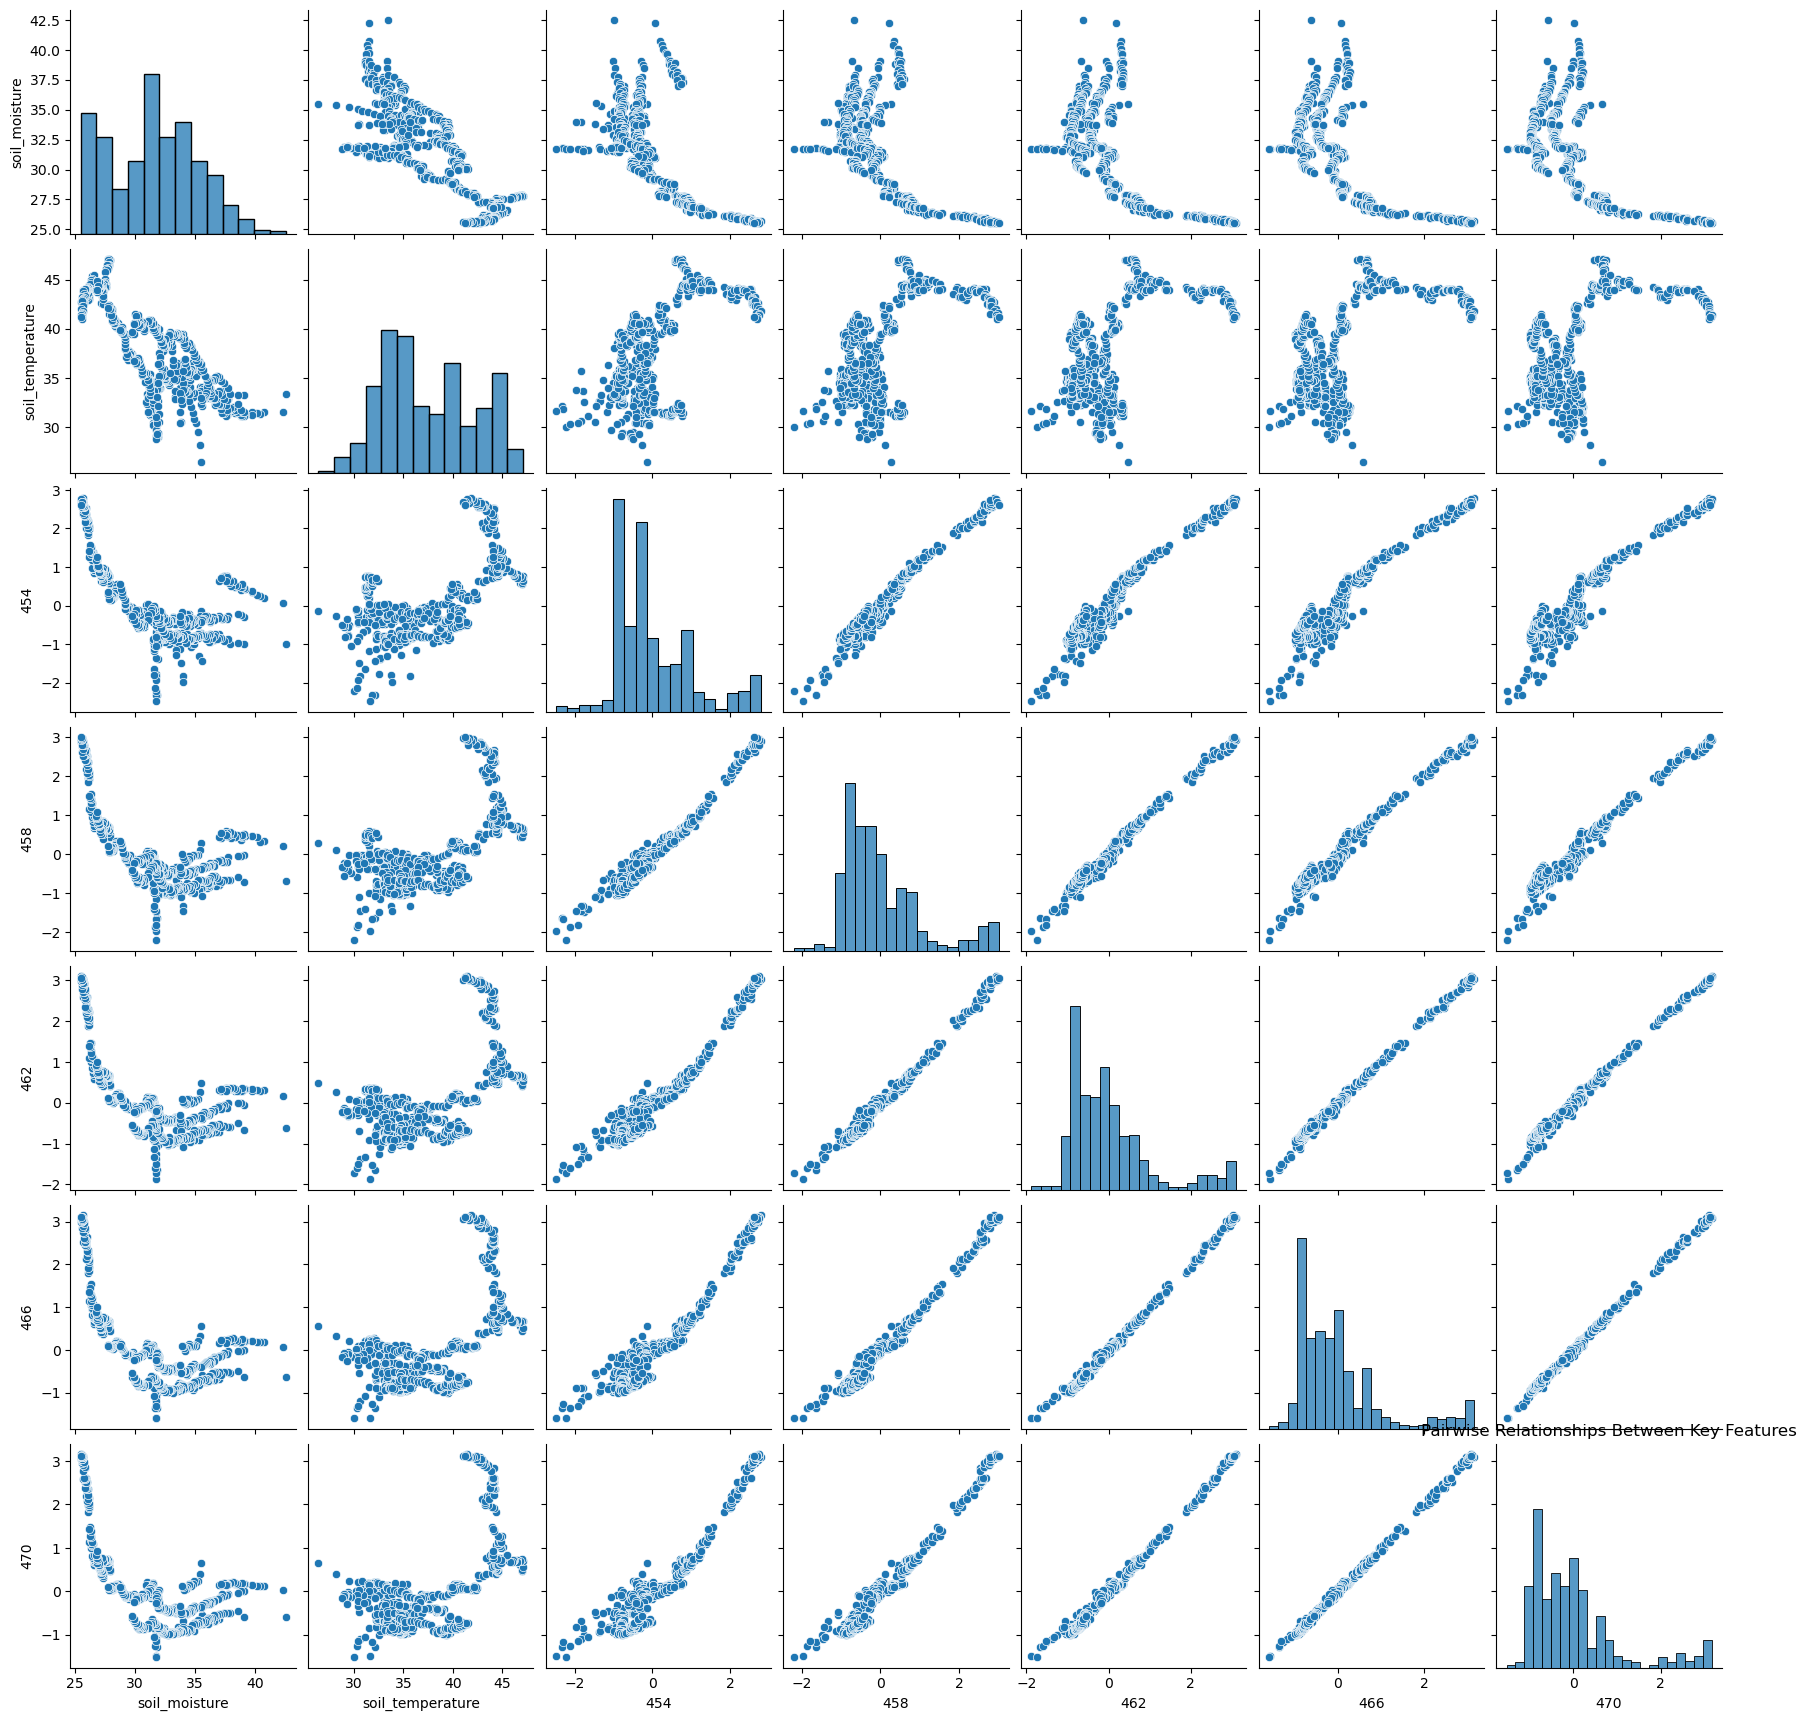

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of key features (e.g., soil moisture, temperature, and first few spectral bands)
subset_columns = ['soil_moisture', 'soil_temperature'] + hyperspectral_columns[:5]

# Pairplot to visualize relationships between selected features
sns.pairplot(data[subset_columns])
plt.title('Pairwise Relationships Between Key Features')
plt.show()
